# 統計的推測

## 点推定

ある確率分布$f(x|\boldsymbol{\theta})$を想定し、その未知の母数$\boldsymbol{\theta}=(\theta_1, ..., \theta_k)$を、その確率分布に従うランダムに抽出した$n$個の標本$\boldsymbol{X}=(X_1,...,X_n)$にもとづいて推定する問題を考える。

::::{margin}
:::{card} 推定量と推定値
確率変数$\boldsymbol{X}$でパラメータ$\boldsymbol{\theta}$を推定する関数を$\boldsymbol{\theta}$の**推定量**（estimator）といい、$\hat{\boldsymbol{\theta}}(\boldsymbol{X})$あるいは$\hat{\boldsymbol{\theta}}$と書く。$\boldsymbol{X}$の実現値$\boldsymbol{x}=(x_1,...,x_n)$を代入したもの$\hat{\boldsymbol{\theta}}(\boldsymbol{x})$を**推定値**（estimate）という。
:::
::::


### モーメント法

$$
X_1, ..., X_n, i.i.d. \sim f(x|\boldsymbol{\theta})
$$

のランダムサンプルについて、モーメント $E[X^r]$ を標本モーメント $\frac{1}{n} \sum^n_{i=1} X_i^r$ で置き換え

$$
\begin{cases}
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i = \mu_1' (\theta_1, ..., \theta_k) \\
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i^2 = \mu_2' (\theta_1, ..., \theta_k) \\
\vdots\\
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i^k = \mu_k' (\theta_1, ..., \theta_k) \\
\end{cases}
$$

の同時方程式を$\theta_1,...,\theta_k$について解くことによって推定量$\hat{\boldsymbol{\theta}}=(\hat{\theta}_1, ..., \hat{\theta}_k)$を得る。これを**モーメント推定量**（moment estimator）という。


:::{admonition} 例
$X \sim N(\mu, \sigma^2)$とすると、

$$
\begin{cases}
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i = \mu\\
\displaystyle \frac{1}{n} \sum^n_{i=1} X_i^2 = \sigma^2 + \mu^2
\end{cases}
$$

より、

$$
\begin{align}
\hat{\mu} &= \frac{1}{n} \sum^n_{i=1} X_i\\
\hat{\sigma}^2 &= \frac{1}{n} \sum^n_{i=1} (X_i - \hat{\mu})^2\\
\end{align}
$$

が$\mu, \sigma^2$のモーメント推定量となる。
:::


::::{margin}
:::{card} $\mu_2 = \sigma^2 + \mu^2$について

$$
\begin{align}
\sigma^2 &= V(X) = E[(X - E[X])^2]\\
&= E[X^2 - 2 X E[X] + E[X]^2] \\
&= E[X^2] - 2E[X] E[X] + E[X]^2\\
&= E[X^2] - 2E[X]^2 + E[X]^2\\
&= E[X^2] - E[X]^2\\
&= \mu_2 - \mu^2
\end{align}
$$
:::
::::



### 最尤推定法

「得られた標本は確率が最大のもの（最も尤もらしいもの）が実現した」という仮定に基づき、もっともらしさの関数（尤度関数）を最大にするパラメータを推定する方法。

**尤度関数**（likelihood function）とは$X_1,...,X_n$の確率関数の積

$$
L(\boldsymbol{\theta}|\boldsymbol{X}) = \prod^n_{i=1} f(X_i|\boldsymbol{\theta})
$$

で、サンプルのもとでその$\theta$のもっともらしさを示す関数である。

確率の積は数学的には扱いにくいので、通常はその対数をとった**対数尤度**

$$
\log L(\boldsymbol{\theta}|\boldsymbol{X}) = \sum^n_{i=1} \log f(X_i|\boldsymbol{\theta})
$$

を扱う。

::::{admonition} 例：コイントス
コインを5回投げて2回表がでた（表を1とすると、$\boldsymbol{X}=(0,1,1,0,0)$）とする。

確率$p$で1をとるベルヌーイ分布の確率質量関数は

$$
P(X=1) = p, P(X=0)= 1-p
$$

であるため、尤度関数は

$$
\begin{align}
L(p|\boldsymbol{X})
&= (1-p) \times p \times p \times (1-p) \times (1-p)\\
&= p^2 (1-p)^{5-2}
\end{align}
$$

となり、尤度関数にいれる$p$の値を変えていくと

$$
\begin{align}
L(p=0.1|\boldsymbol{X}) = 0.1^2 \times 0.9^3 = 0.00729\\
L(p=0.5|\boldsymbol{X}) = 0.5^2 \times 0.5^3 = 0.03125\\
L(p=0.9|\boldsymbol{X}) = 0.9^2 \times 0.1^3 = 0.00081
\end{align}
$$

のようになる。これを繰り返すと次の図のように描くことができる。

:::{glue:figure} cointoss_likelihood
:::

そして、尤度関数を最大化するパラメータを点推定量として採用する。
::::

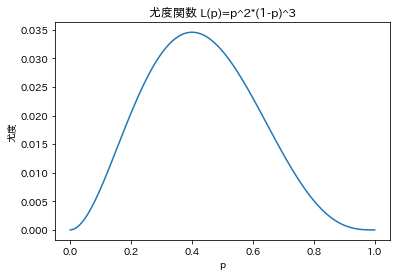

In [2]:
# 尤度関数のプロットを描いたコード
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

x = np.array([0, 1, 1, 0, 0])

def bernoulli(p, r, n):
    return p ** r * (1 - p) ** (n - r)

theta = np.linspace(0, 1, 100)
likelihood = [bernoulli(p, r = sum(x), n = len(x)) for p in theta]


fig, ax = plt.subplots()
ax.plot(theta, likelihood)
ax.set(xlabel='p', ylabel='尤度', title='尤度関数 L(p)=p^2*(1-p)^3')

from myst_nb import glue
glue("cointoss_likelihood", fig, display=False)

### ベイズ法

同時確率密度関数$f(\boldsymbol{x}|\boldsymbol{\theta})$の$\boldsymbol{\theta}$を確率変数とみなして確率分布を仮定する。これを**事前分布**（prior distribution）といい、$\pi(\boldsymbol{\theta}|\boldsymbol{\xi})$と書く。$\boldsymbol{\xi}$は事前分布の母数であり、**超母数**（hyperparameter）と呼ばれる。

このモデルは次のように表される。

$$
\begin{cases}
\boldsymbol{X}|\boldsymbol{\theta} \sim f(\boldsymbol{x}|\boldsymbol{\theta})\\
\boldsymbol{\theta} \sim \pi (\boldsymbol{\theta}|\boldsymbol{\xi})
\end{cases}
$$


$\boldsymbol{X}=\boldsymbol{x}$を与えたときの$\boldsymbol{\theta}$の条件付き分布を$\boldsymbol{\theta}$の**事後分布**（posterior distribution）といい、

$$
\displaystyle \pi(\boldsymbol{\theta | x, \xi})
= \frac{ f(\boldsymbol{x|\theta}) \pi(\boldsymbol{\theta|\xi}) } { f_\pi (\boldsymbol{x | \xi}) }
$$

で与えられる。

ここで$f_\pi (\boldsymbol{x | \xi})$は$\boldsymbol{X}$の周辺分布で、$\boldsymbol{\theta}$が連続型確率変数のとき

$$
f_\pi (\boldsymbol{x | \xi}) = \int f(\boldsymbol{x|\theta}) \pi(\boldsymbol{\theta|\xi}) d \boldsymbol{\theta}
$$

である。


ベイズ法とは事後分布から推定量を導く方法である。事後分布の平均$E[\boldsymbol{\theta|X}]$は**事後期待値**（expected a posteriori: EAP）と呼ばれる。
事後分布の最頻値は**事後確率最大値**（maximum a posteriori: MAP）や**ベイズ的最尤推定量**（Bayesian maximum likelihood estimator）と呼ばれる。こうした分布の代表値を使用して点推定を行うことができる。

In [40]:
# nest_asyncio: asyncioを使うstanをjupyterで使うための対処
# [Stanによる推定例：ベルヌーイ分布のパラメータ - The One with ...](https://hamada.hatenablog.jp/entry/2017/06/28/100815)

import nest_asyncio
nest_asyncio.apply()

import stan


stan_code = """
data {
    int N;
    array[N] int X;
}
parameters {
    real<lower=0, upper=1> p;
}
model {
    for (i in 1:N) 
        X[i] ~ bernoulli(p);
}
"""

x = np.array([0, 1, 1, 0, 0])

data = {
    "N": len(x),
    "X": x,
}

posterior = stan.build(stan_code, data=data, random_seed=1)
fit = posterior.sample(num_chains=10, num_samples=1000)
df = fit.to_frame()
df

Building: found in cache, done.
Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling:  10% (2000/20000)
Sampling:  20% (4000/20000)
Sampling:  30% (6000/20000)
Sampling:  40% (8000/20000)
Sampling:  50% (10000/20000)
Sampling:  60% (12000/20000)
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.02 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p
draws,,,,,,,,
0,-5.642715,0.858490,0.844098,1.0,3.0,0.0,5.727999,0.670866
1,-4.881275,0.989540,0.943361,1.0,3.0,0.0,5.861898,0.346497
2,-4.780382,0.981418,1.283229,2.0,3.0,0.0,5.292580,0.427244
3,-5.275625,0.868117,0.935121,1.0,3.0,0.0,5.452545,0.255209
4,-4.792388,0.998572,0.814226,2.0,3.0,0.0,4.885668,0.457724
...,...,...,...,...,...,...,...,...
9995,-4.780359,0.949375,1.154637,2.0,3.0,0.0,5.246708,0.428180
9996,-5.712871,0.754834,0.976298,1.0,3.0,0.0,5.916396,0.200804
9997,-6.685109,1.000000,0.934847,2.0,3.0,0.0,7.966974,0.129600


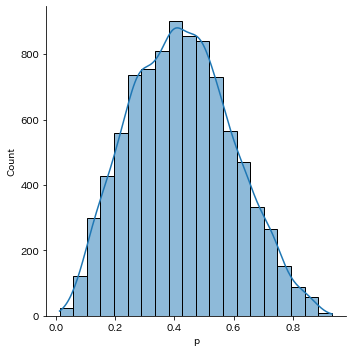

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.displot(x="p", data=df.iloc[1000:, :], kde=True, bins=20)

### 例

あるゲームのガチャを1000回引いた結果、「外れ」と「当たり」の回数が以下のようになった。このガチャの「当たり」の確率はいくつか。

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.random.binomial(n=1, p=0.1, size=1000)
x = pd.Series(x)

table = x.map({0: "外れ", 1: "当たり"}).value_counts().to_frame()
table.columns = ['回数']
table.T

,外れ,当たり
回数,892,108


#### モーメント法による推定

<!-- 試行回数$n$、成功確率$p$の二項分布$Bi(n, p)$の平均は$np$であるため、標本平均を$n$で乗じれば$p$が推定できる

$$
\hat{p} = \frac{np}{n} = \frac{1}{n^2} \sum^n_{i=1} X_i
$$
 -->
 
ベルヌーイ分布$Ber(p)$の平均が成功確率$p$なので、$\hat{p} = \sum^n_{i=1} X_i / n$

In [69]:
# モーメント法による推定
n = len(x)
sum(x) / n

0.108

#### 最尤法による推定

ベルヌーイ分布

$X_i = 1$となる確率が$p$のベルヌーイ分布$Ber(p)$に従った確率変数の実現値がサンプルだとしたとき、$r=\sum X_i$とすると、その尤度関数は

$$
L(p|X) = p^r (1-p)^{n-r}
$$

であり、対数尤度関数は

$$
\log L(p|X) = r \log p + (n-r) \log (1-p)
$$

となる。

今回のサンプルのもとでは次の図のような曲線になる。（グレーの縦線は最尤推定値のpを示す）

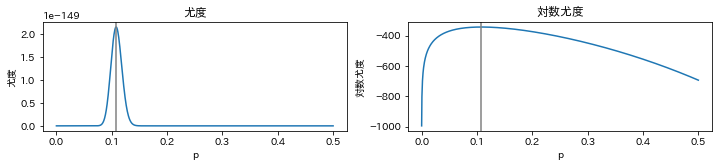

In [83]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 2))

# 尤度関数
p_candidates = np.linspace(0.0001, 0.5, 1000)
likelihood = np.array([bernoulli(p, n = len(x), r = sum(x)) for p in p_candidates])
max_p = p_candidates[np.argmax(likelihood)]  # 最尤推定値

axes[0].plot(p_candidates, likelihood)
axes[0].set(xlabel='p', ylabel='尤度', title='尤度')
axes[0].axvline(max_p, color="gray")


# 対数尤度関数
def log_bernoulli(p, n, r):
    return r * np.log(p) + (n - r) * np.log(1 - p)

likelihood = np.array([log_bernoulli(p, n = len(x), r = sum(x)) for p in p_candidates])
max_p = p_candidates[np.argmax(likelihood)]  # 最尤推定値

axes[1].plot(p_candidates, likelihood)
axes[1].set(xlabel='p', ylabel='対数尤度', title='対数尤度')
axes[1].axvline(max_p, color="gray")

fig.show()

対数尤度の導関数は

$$
\frac{\partial \log L(p|X)}{\partial p} = \frac{r}{p} - \frac{n-r}{1-p}
$$

で、これを0とおいて$p$について解くと

$$
p = \frac{r}{n} = \frac{\sum X_i}{n}
$$

となり、モーメント法と同じ結果になる。

:::{card} 式展開
$$
\frac{\partial \log L(p|X)}{\partial p} = \frac{r}{p} - \frac{n-r}{1-p} = 0
$$

$$
\begin{align}
\frac{r}{p} &= \frac{n-r}{1-p}\\
\frac{p}{1-p} &= \frac{r}{n-r}\\
p &= \frac{r(1-p)}{n-r} = \frac{r(1-p)}{r(\frac{n}{r} - 1)} = \frac{1-p}{\frac{n}{r} - 1}\\
p (\frac{n}{r} - 1) &= 1 - p\\
p \frac{n}{r} = 1\\
p = \frac{r}{n}
\end{align}
$$
:::


解析的に解くことができない場合は勾配降下法などで数値的に解く。

### ベイズ推定

Stanを用いる




:::{admonition} 参考資料
- [Stan モデリング言語: ユーザーガイド・リファレンスマニュアル](https://stan-ja.github.io/gh-pages-html/)
:::


## 区間推定